## **Agenda**



#### 1. **NLP Overview:**
   - Definition and Importance
   - Key Challenges

#### 2. **How to Process Data:**
   - Text Cleaning
   - Tokenization
   - Stopword Removal
   - Lemmatization
   

#### 3. **How ML Models Work:**
   - Introduction to Machine Learning
   - Text Representation
      - Bag of Words
      - TF-IDF
      - Word Embeddings (Word2Vec)


#### 4. **Word Embeddings (Word2Vec):**
   - Word2Vec Basics
   - Gensim Library for Word2Vec


#### 5. **Seq2Seq Models:**
   - Introduction to Seq2Seq
   - Encoder-Decoder Architecture


#### 6. **Transformer Models with Attention:**
   - Introduction to Transformers
   - BERT (Bidirectional Encoder Representations from Transformers)



## **1. NLP Overview: Definition and Importance**



#### **1.1 Definition:**

NLP, or Natural Language Processing, is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and human language. The goal is to enable machines to understand, interpret, and generate human-like text.

In practical terms, NLP involves the development of algorithms and models that can:

- Understand the meaning behind a piece of text.
- Extract relevant information from unstructured data.
- Generate coherent and contextually relevant text.




#### **1.2 Importance of NLP:**

NLP plays a crucial role in various applications, contributing to advancements in technology and improving user experiences. Some key areas where NLP is essential include:

- **Chatbots and Virtual Assistants:** NLP powers conversational agents, allowing users to interact with machines in a natural language.

- **Information Extraction:** NLP helps extract structured information from unstructured text, such as named entities, relationships, and events.

- **Sentiment Analysis:** Businesses use NLP to analyze customer sentiments expressed in reviews, social media, or surveys.

- **Language Translation:** NLP is behind machine translation systems that enable the translation of text from one language to another.

- **Speech Recognition:** NLP algorithms are used to convert spoken language into written text, facilitating voice-activated systems.



#### **1.3 Key Challenges in NLP:**

Despite the advancements, NLP faces several challenges due to the complexity and nuances of human language. Some key challenges include:

- **Ambiguity:** Words and phrases often have multiple meanings based on context, making it challenging for machines to accurately interpret.

- **Sarcasm and Irony:** Detecting sarcasm, irony, and other forms of figurative language is difficult for NLP systems, as it requires understanding contextual cues.

- **Lack of Context:** Understanding context is essential for accurate language comprehension. NLP models may struggle when faced with ambiguous or incomplete information.

- **Data Limitations:** NLP models heavily rely on large amounts of labeled data for training. Limited or biased datasets can lead to biased and less accurate models.



To summarize, NLP is about making it possible for computers to understand and interact with human language, enabling a range of applications
that improve how we communicate with technology and how technology serves us.

Problem statement:
- The food was great. Service was Okish, it could have been better --> Neutral
- I have never tasted food like this. Chef was really really AWESOME --> Positive
- The place was not as expected. Never go here --> Negative
- I have never tasted food like this. The owner himself should taste the food.

#### **Real-life Example:**

To illustrate the importance of NLP, consider a social media sentiment analysis application. The goal is to determine the sentiment (positive, negative, or neutral) of user comments about a product. NLP techniques, such as tokenization and sentiment analysis models, can be employed to automatically analyze and categorize user sentiments.


In [1]:
import pandas as pd
import tensorflow_datasets as tfds

def load_and_convert_to_dataframe(dataset_name, split="train"):
    """
    Load a dataset from TensorFlow Datasets and convert it to a Pandas DataFrame.

    Args:
        dataset_name (str): The name of the dataset to load.
        split (str): The split of the dataset to load ('train', 'test', etc.). Default is 'train'.

    Returns:
        pd.DataFrame: A DataFrame containing the reviews and their corresponding sentiment labels.
    """
    try:
        # Load dataset
        ds, ds_info = tfds.load(
            dataset_name, split=split, as_supervised=True, with_info=True
        )

        # Convert to DataFrame
        data = [
            (text.decode("utf-8"), "positive" if label == 1 else "negative")
            for text, label in tfds.as_numpy(ds)
        ]
        df = pd.DataFrame(data, columns=["review", "sentiment"])

        print(f"Loaded {dataset_name} dataset with {len(df)} records.")
        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return an empty DataFrame if there's an error


# Convert training dataset to DataFrame
df_train = load_and_convert_to_dataframe("YelpPolarityReviews", split="train")

# If required, other splits like 'test' can be loaded similarly
# df_test = load_and_convert_to_dataframe('YelpPolarityReviews', split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.P8BULN_0.2.0/yelp_polarity_reviews-train.…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.P8BULN_0.2.0/yelp_polarity_reviews-test.t…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.
Loaded YelpPolarityReviews dataset with 560000 records.


In [3]:
df_train.head()

,review,sentiment
0,The Groovy P. and I ventured to his old stompi...,positive
1,Mediocre burgers - if you are in the area and ...,negative
2,Not at all impressed...our server was not very...,negative
3,I wish I would have read Megan P's review befo...,negative
4,A large selection of food from all over the wo...,positive


In [4]:
print(len(df_train))

560000


In [5]:
df_train=df_train.dropna()
print(len(df_train))

560000


In [6]:
df_train.iloc[0]["review"]

"The Groovy P. and I ventured to his old stomping grounds for lunch today.  The '5 and Diner' on 16th St and Colter left me with little to ask for.  Before coming here I had a preconceived notion that 5 & Diners were dirty and nasty. Not the case at all.\\n\\nWe walk in and let the waitress know we want to sit outside (since it's so nice and they had misters).  We get two different servers bringing us stuff (talk about service) and I ask the one waitress for recommendations.  I didn't listen to her, of course, and ordered the Southwestern Burger w/ coleslaw and started with a nice stack of rings.\\n\\nThe Onion Rings were perfectly cooked.  They looked like they were prepackaged, but they were very crispy and I could actually bite through the onion without pulling the entire thing out (don't you hate that?!!!)\\n\\nThe Southwestern Burger was order Medium Rare and was cooked accordingly.  Soft, juicy, and pink with a nice crispy browned outer layer that can only be achieved on a well u

In [7]:
df_train.iloc[0]["sentiment"]

'positive'

In [8]:
df_train.iloc[3]["review"]

"I wish I would have read Megan P's review before I decided to cancel my dinner reservations because I was offered a COMP dinner at Beso.  \\n\\nTwo of my girlfriends and I were walking around Fashion Show Mall as a promoter approaches us to ask if we'd like to go to Eve Nightclub that night.  We wanted to go to Haze and XS so we declined.  The promoter (by the way - his name is ANDRE) offers us a comp dinner at Beso Eva Longoria's restaurant at Crystals Mall.  I guess what's the catch right?  Is there a comp limit and we have to pay after we hit the limit?  No, it's a set dinner.  He sets everything up and promises he'll even walk us into Haze and XS afterwards (which I actually believed).  \\n\\nHere's a review for ANDRE:\\nHe tells you to call him when you're at the restaurant to get you seated.  Well - he doesn't even pick up or return text messages.  Basically, I never even see him again since he approached us at Fashion Show Mall.  He never came to give us our bottle of campagne 

In [9]:
df_train.iloc[3]["sentiment"]

'negative'

<ipython-input-10-d3c5d8d4384b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


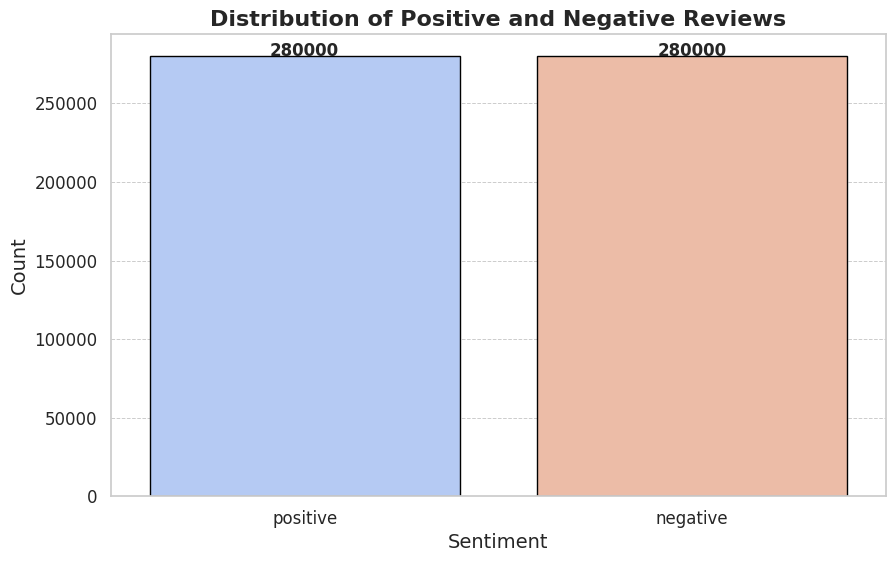

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the sentiment values
sentiment_counts = df_train["sentiment"].value_counts()

# Set the style and color palette
sns.set(style="whitegrid", palette="pastel")


# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution as a bar chart
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette="coolwarm",
    edgecolor="black",
)

# Add titles and labels
plt.title("Distribution of Positive and Negative Reviews", fontsize=16, weight="bold")
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", linewidth=0.7)

# Add value labels on top of each bar
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value + 50, str(value), ha="center", fontsize=12, weight="bold")

# Show the plot
plt.show()

Textblob is an object that provides a simple API for common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more

TextBlob has an attribute "sentiment" that returns a namedtuple representing the sentiment of a given text. This namedtuple typically consists of two fields: polarity and subjectivity.

Polarity: It represents the emotion expressed in the text, as described earlier. It is a floating-point number within the range [-1.0, 1.0], where negative values indicate negative sentiment, positive values indicate positive sentiment, and zero represents a neutral sentiment.

Subjectivity: It represents the subjectivity of the text, i.e., how subjective or objective the text is. It is also a floating-point number within the range [0.0, 1.0], where 0.0 is very objective and 1.0 is very subjective.

In [11]:
from textblob import TextBlob
#try putting a text here as an example
text="the taste of food was good, but was cold and reached very late"
analysis = TextBlob(text)
sentiment_polarity = analysis.sentiment.polarity
print(sentiment_polarity)

-0.09666666666666668


In [12]:
from textblob import TextBlob
from tqdm import tqdm

# Limit the analysis to the first 200 reviews
num_reviews_to_analyze = 200

# Initialize variables for accuracy calculation
correct_predictions = 0
total_reviews = 0

# Progress bar for visual feedback during the loop
print("Analyzing sentiment of reviews...")
for index, row in tqdm(
    df_train.head(num_reviews_to_analyze).iterrows(), total=num_reviews_to_analyze
):
    # Extract the review text from the 'review' column
    review_text = row["review"]

    # Check if the review text is not empty
    if not isinstance(review_text, str) or review_text.strip() == "":
        print(f"Skipping empty or invalid review at index {index}.")
        continue

    # Create a TextBlob object for the current review
    analysis = TextBlob(review_text)

    # Calculate the sentiment polarity of the review
    sentiment_polarity = analysis.sentiment.polarity

    # Convert polarity to predicted sentiment label
    if sentiment_polarity > 0:
        predicted_sentiment = "positive"
    elif sentiment_polarity < 0:
        predicted_sentiment = "negative"
    else:
        predicted_sentiment = "neutral"

    # Compare with the true sentiment label
    true_sentiment = row["sentiment"]

    # Check if prediction is correct
    if predicted_sentiment == true_sentiment:
        correct_predictions += 1

    # Increment the total number of valid reviews processed
    total_reviews += 1

    # Print the sentiment polarity and predicted sentiment of the review
    print(
        f"Review {index + 1}: Polarity={sentiment_polarity:.2f}, Predicted Sentiment={predicted_sentiment}, True Sentiment={true_sentiment}"
    )

# Calculate accuracy
accuracy = (correct_predictions / total_reviews) * 100 if total_reviews > 0 else 0
print(f"\nProcessed {total_reviews} reviews.")
print(f"Accuracy: {accuracy:.2f}%")

# Handle case where no valid reviews were processed
if total_reviews == 0:
    print("No valid reviews were processed.")

Analyzing sentiment of reviews...


  6%|▋         | 13/200 [00:00<00:01, 128.15it/s]

Review 1: Polarity=0.15, Predicted Sentiment=positive, True Sentiment=positive
Review 2: Polarity=0.07, Predicted Sentiment=positive, True Sentiment=negative
Review 3: Polarity=0.21, Predicted Sentiment=positive, True Sentiment=negative
Review 4: Polarity=0.18, Predicted Sentiment=positive, True Sentiment=negative
Review 5: Polarity=0.54, Predicted Sentiment=positive, True Sentiment=positive
Review 6: Polarity=0.23, Predicted Sentiment=positive, True Sentiment=positive
Review 7: Polarity=0.41, Predicted Sentiment=positive, True Sentiment=positive
Review 8: Polarity=0.36, Predicted Sentiment=positive, True Sentiment=positive
Review 9: Polarity=0.39, Predicted Sentiment=positive, True Sentiment=positive
Review 10: Polarity=0.15, Predicted Sentiment=positive, True Sentiment=positive
Review 11: Polarity=-0.11, Predicted Sentiment=negative, True Sentiment=negative
Review 12: Polarity=-0.16, Predicted Sentiment=negative, True Sentiment=positive
Review 13: Polarity=0.00, Predicted Sentiment=n

 16%|█▌        | 31/200 [00:00<00:01, 157.82it/s]


Review 29: Polarity=0.22, Predicted Sentiment=positive, True Sentiment=negative
Review 30: Polarity=0.01, Predicted Sentiment=positive, True Sentiment=negative
Review 31: Polarity=0.19, Predicted Sentiment=positive, True Sentiment=negative
Review 32: Polarity=0.40, Predicted Sentiment=positive, True Sentiment=positive
Review 33: Polarity=0.29, Predicted Sentiment=positive, True Sentiment=positive
Review 34: Polarity=0.00, Predicted Sentiment=neutral, True Sentiment=negative

 25%|██▌       | 50/200 [00:00<00:00, 171.84it/s]


Review 35: Polarity=-0.25, Predicted Sentiment=negative, True Sentiment=negative
Review 36: Polarity=0.42, Predicted Sentiment=positive, True Sentiment=positive
Review 37: Polarity=0.21, Predicted Sentiment=positive, True Sentiment=positive
Review 38: Polarity=0.27, Predicted Sentiment=positive, True Sentiment=positive
Review 39: Polarity=0.33, Predicted Sentiment=positive, True Sentiment=positive
Review 40: Polarity=-0.06, Predicted Sentiment=negative, True Sentiment=negative
Review 41: Polarity=0.17, Predicted Sentiment=positive, True Sentiment=positive
Review 42: Polarity=0.24, Predicted Sentiment=positive, True Sentiment=positive
Review 43: Polarity=0.18, Predicted Sentiment=positive, True Sentiment=positive
Review 44: Polarity=0.35, Predicted Sentiment=positive, True Sentiment=positive
Review 45: Polarity=-0.02, Predicted Sentiment=negative, True Sentiment=negative
Review 46: Polarity=-0.08, Predicted Sentiment=negative, True Sentiment=negative
Review 47: Polarity=-0.18, Predicte

 36%|███▋      | 73/200 [00:00<00:00, 189.76it/s]

Review 70: Polarity=-0.35, Predicted Sentiment=negative, True Sentiment=negative
Review 71: Polarity=0.73, Predicted Sentiment=positive, True Sentiment=negative
Review 72: Polarity=0.38, Predicted Sentiment=positive, True Sentiment=positive
Review 73: Polarity=0.35, Predicted Sentiment=positive, True Sentiment=positive


 46%|████▌     | 92/200 [00:00<00:00, 171.19it/s]

Review 74: Polarity=0.11, Predicted Sentiment=positive, True Sentiment=negative
Review 75: Polarity=0.09, Predicted Sentiment=positive, True Sentiment=negative
Review 76: Polarity=-0.09, Predicted Sentiment=negative, True Sentiment=negative
Review 77: Polarity=0.05, Predicted Sentiment=positive, True Sentiment=negative
Review 78: Polarity=-0.10, Predicted Sentiment=negative, True Sentiment=negative
Review 79: Polarity=0.11, Predicted Sentiment=positive, True Sentiment=positive
Review 80: Polarity=0.14, Predicted Sentiment=positive, True Sentiment=positive
Review 81: Polarity=0.27, Predicted Sentiment=positive, True Sentiment=positive
Review 82: Polarity=0.12, Predicted Sentiment=positive, True Sentiment=negative
Review 83: Polarity=-0.09, Predicted Sentiment=negative, True Sentiment=negative
Review 84: Polarity=0.07, Predicted Sentiment=positive, True Sentiment=negative
Review 85: Polarity=0.17, Predicted Sentiment=positive, True Sentiment=negative
Review 86: Polarity=0.42, Predicted S

 76%|███████▋  | 153/200 [00:00<00:00, 244.33it/s]


Review 113: Polarity=0.08, Predicted Sentiment=positive, True Sentiment=positive
Review 114: Polarity=-0.10, Predicted Sentiment=negative, True Sentiment=negative
Review 115: Polarity=0.44, Predicted Sentiment=positive, True Sentiment=positive
Review 116: Polarity=0.28, Predicted Sentiment=positive, True Sentiment=positive
Review 117: Polarity=0.17, Predicted Sentiment=positive, True Sentiment=negative
Review 118: Polarity=-0.14, Predicted Sentiment=negative, True Sentiment=positive
Review 119: Polarity=0.08, Predicted Sentiment=positive, True Sentiment=negative
Review 120: Polarity=0.18, Predicted Sentiment=positive, True Sentiment=negative
Review 121: Polarity=-0.05, Predicted Sentiment=negative, True Sentiment=negative
Review 122: Polarity=-0.38, Predicted Sentiment=negative, True Sentiment=negative
Review 123: Polarity=0.47, Predicted Sentiment=positive, True Sentiment=positive
Review 124: Polarity=0.33, Predicted Sentiment=positive, True Sentiment=positive
Review 125: Polarity=0.

100%|██████████| 200/200 [00:00<00:00, 218.73it/s]

Review 186: Polarity=-0.03, Predicted Sentiment=negative, True Sentiment=positive
Review 187: Polarity=0.61, Predicted Sentiment=positive, True Sentiment=positive
Review 188: Polarity=-0.26, Predicted Sentiment=negative, True Sentiment=negative
Review 189: Polarity=0.33, Predicted Sentiment=positive, True Sentiment=positive
Review 190: Polarity=0.50, Predicted Sentiment=positive, True Sentiment=positive
Review 191: Polarity=0.42, Predicted Sentiment=positive, True Sentiment=positive
Review 192: Polarity=0.14, Predicted Sentiment=positive, True Sentiment=positive
Review 193: Polarity=0.10, Predicted Sentiment=positive, True Sentiment=negative
Review 194: Polarity=0.42, Predicted Sentiment=positive, True Sentiment=positive
Review 195: Polarity=0.10, Predicted Sentiment=positive, True Sentiment=negative
Review 196: Polarity=0.45, Predicted Sentiment=positive, True Sentiment=negative
Review 197: Polarity=0.11, Predicted Sentiment=positive, True Sentiment=negative
Review 198: Polarity=0.30,


## **2. How to Process Data:**

In [13]:
# Before starting lets sample our dataset with only 30k reviews for ease of comutation
df_train = df_train.sample(n=30000, random_state=42)

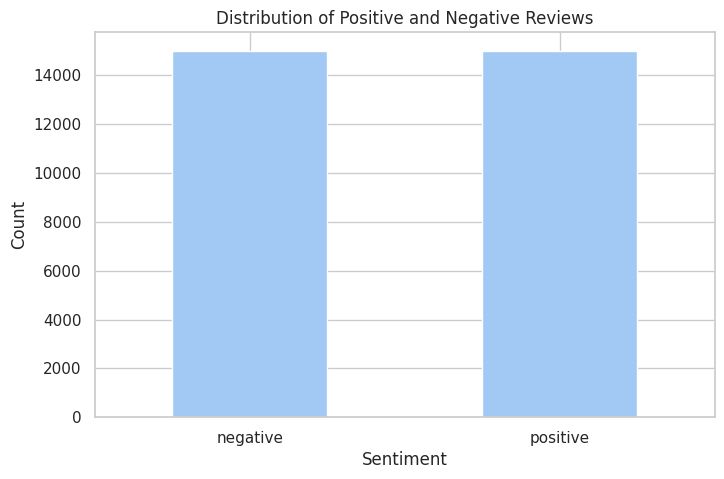

In [14]:
import matplotlib.pyplot as plt
sentiment_counts = df_train["sentiment"].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



#### **2.1 Text Cleaning:**

Text cleaning involves removing unnecessary elements from the text, such as special characters or unwanted symbols.

Parsing all html tags using library BeautifulSoup

In [15]:
#Example
from bs4 import BeautifulSoup

# Sample text with HTML tags
text_with_html = "<p>This is a sample <b>Food</b> review.</p>"

# Remove HTML tags using BeautifulSoup
text_without_html = BeautifulSoup(text_with_html, "html.parser").get_text()

print("Text without HTML tags:", text_without_html)

Text without HTML tags: This is a sample Food review.


We remove additional characters except digits and alphabets; Convert letters to lowercase for standardization

In [16]:
import re
# Remove HTML tags (if any)
df_train["review"] = df_train["review"].apply(
    lambda x: BeautifulSoup(x, "html.parser").get_text()
)
# Convert to lowercase
df_train["review"] = df_train["review"].apply(lambda x: x.lower())
# Remove punctuation and non-alphanumeric characters
df_train["review"] = df_train["review"].apply(
    lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x)
)
df_train.head()

<ipython-input-16-5ade1ba2df01>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda x: BeautifulSoup(x, "html.parser").get_text()
<ipython-input-16-5ade1ba2df01>:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  lambda x: BeautifulSoup(x, "html.parser").get_text()


,review,sentiment
34566,i went in having loved what the past restauran...,negative
223092,i like paradise bakery in general they serve ...,negative
110270,this is my goto spot for wine and spiritsnni p...,positive
365013,i have stayed with this family of resorts twic...,negative
311625,easily one of the best brunches i have ever ha...,positive


#### **2.2 Tokenization:**

Tokenization is the process of breaking text into individual words or tokens.


In [17]:
# Import the Natural Language Toolkit (nltk) library
import nltk

# Download the Punkt tokenizer model (if not already downloaded)
nltk.download('punkt')

# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Sample text
sample_text = "This is random text."

# Tokenize the text using word_tokenize
tokens = word_tokenize(sample_text)

# Print the list of tokens
print(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'is', 'random', 'text', '.']


In [18]:
# Tokenization
df_train["review"] = df_train["review"].apply(lambda x: word_tokenize(x))

In [19]:
df_train.head()

,review,sentiment
34566,"[i, went, in, having, loved, what, the, past, ...",negative
223092,"[i, like, paradise, bakery, in, general, they,...",negative
110270,"[this, is, my, goto, spot, for, wine, and, spi...",positive
365013,"[i, have, stayed, with, this, family, of, reso...",negative
311625,"[easily, one, of, the, best, brunches, i, have...",positive


#### **2.3 Stopword Removal:**

Stopwords are common words that do not carry significant meaning and are often removed to focus on the more meaningful words.


In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
df_train["review"] = df_train["review"].apply(
    lambda x: [word for word in x if word not in stop_words]
)

df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
34566,"[went, loved, past, restaurant, nni, craving, ...",negative
223092,"[like, paradise, bakery, general, serve, great...",negative
110270,"[goto, spot, wine, spiritsnni, priced, lees, n...",positive
365013,"[stayed, family, resorts, twice, orlando, twic...",negative
311625,"[easily, one, best, brunches, ever, long, stor...",positive


#### **2.4 Lemmatization:**

Lemmatization reduces words to their base or root form to unify words with similar meanings.

In [ ]:
word->root word
reduce the original tokens

pizza
pizza

In [21]:
# Import the WordNetLemmatizer class from the nltk.stem module
from nltk.stem import WordNetLemmatizer

# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Import the Natural Language Toolkit (nltk) library
import nltk

# Download the WordNet dataset (if not already downloaded)
nltk.download('wordnet')

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Example sentence
sentence = "The quick brown foxes are jumping over the lazy dogs."

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Lemmatize the tokens
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Print the original tokens and the lemmatized tokens
print("Original Tokens:", tokens)
print("Lemmatized Tokens:", lemmatized_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Original Tokens: ['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'over', 'the', 'lazy', 'dogs', '.']
Lemmatized Tokens: ['The', 'quick', 'brown', 'fox', 'are', 'jumping', 'over', 'the', 'lazy', 'dog', '.']


In [22]:
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not downloaded)
nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
df_train["review"] = df_train["review"].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)

# Convert list of tokens back to strings
df_train["review"] = df_train["review"].apply(lambda x: " ".join(x))

df_train.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
34566,went loved past restaurant nni craving hot sou...,negative
223092,like paradise bakery general serve great sandw...,negative
110270,goto spot wine spiritsnni priced lee nearby ha...,positive
365013,stayed family resort twice orlando twice westo...,negative
311625,easily one best brunch ever long story short g...,positive


**Explanation:**
- `lemmatizer.lemmatize(word)`: Lemmatizes each word using the WordNet lemmatizer.

**Real-life Example:**  
In information extraction, lemmatization can help in grouping different forms of a word (e.g., "running" and "ran") under a common lemma.


## **3. How ML Models Work:**



#### **3.1 Introduction to Machine Learning:**

Machine Learning (ML) involves the development of algorithms that enable computers to learn patterns from data and make predictions or decisions without being explicitly programmed. In the context of NLP, machine learning models can be trained on textual data to perform various tasks such as sentiment analysis, classification, or language translation.

#### **3.2 Text Representation:**

Before feeding text data into machine learning models, it needs to be converted into a numerical format. Several methods are used for text representation, each with its own advantages and drawbacks.

#### **3.3 Bag of Words (BoW):**

The Bag of Words model represents a document as an unordered set of words, disregarding grammar and word order. It creates a matrix where each row corresponds to a document, and each column corresponds to a unique word in the entire corpus.


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure that each review is a single string by joining token lists (if necessary)
df_train["review"] = df_train["review"].apply(
    lambda x: " ".join(x) if isinstance(x, list) else x
)

# Create a CountVectorizer object
count_vectorizer = CountVectorizer()

# Fit and transform the text data to obtain the count vectors
count_vectors = count_vectorizer.fit_transform(df_train["review"])

# Convert the count vectors to an array
count_vectors_array = count_vectors.toarray()

# Display the count vectors
print("Count Vectors:")
print(count_vectors_array)

Count Vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(len(df_train))

30000


In [25]:
df_train["review"].iloc[3]

'stayed family resort twice orlando twice weston virginia property always top notch till grandview others said mirror lamp room ha broke many piece glued back toghther ordered walker room arrival month advance called two day ariving day arrival told set arrived 2 30 front desk said stair security deliver right away 900 called front desk still arrived come find wasnt even property yet sign front everywhere telling park 15 minute check would great check process took 15 minute doesnt sign control long claim handicap friendly resort 3 handicap spot per 500 room building activity daily three thing day trio grocery shop pool picture crap lesson day day day kid adult activity would expect first rate time share'

In [26]:
print(count_vectors[3])

  (0, 57036)	1
  (0, 8282)	1
  (0, 60315)	1
  (0, 17641)	1
  (0, 68355)	2
  (0, 75600)	1
  (0, 34523)	1
  (0, 5282)	1
  (0, 45293)	1
  (0, 20954)	6
  (0, 80119)	1
  (0, 74526)	1
  (0, 709)	2
  (0, 27374)	1
  (0, 75322)	1
  (0, 28688)	1
  (0, 66213)	2
  (0, 82405)	2
  (0, 57309)	1
  (0, 87004)	1
  (0, 85209)	1
  (0, 63282)	2
  (0, 81060)	1
  (0, 54689)	1
  (0, 80107)	1
  :	:
  (0, 23844)	1
  (0, 18611)	1
  (0, 16671)	1
  (0, 35783)	2
  (0, 31721)	1
  (0, 59630)	1
  (0, 2298)	1
  (0, 12991)	1
  (0, 3843)	2
  (0, 20669)	1
  (0, 79850)	1
  (0, 79475)	1
  (0, 81888)	1
  (0, 34845)	1
  (0, 71479)	1
  (0, 61659)	1
  (0, 60295)	1
  (0, 19556)	1
  (0, 44259)	1
  (0, 42643)	1
  (0, 4061)	1
  (0, 27928)	1
  (0, 29793)	1
  (0, 64525)	1
  (0, 71121)	1


In [27]:
print(count_vectors_array[0])

[0 0 0 ... 0 0 0]


In [28]:
X=count_vectors_array
# Create a mapping dictionary
label_mapping = {"positive": 1, "negative": 0}

# Convert string labels to numerical labels
y = [label_mapping[label] for label in df_train["sentiment"]]
print(y)

[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classifiers you want to experiment with
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Ensure the data is limited to the top 200 reviews
X = X[:200]
y = y[:200]

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Naive Bayes


Multinomial Naive Bayes Accuracy: 84.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.81      0.88      0.85        25

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50

Confusion Matrix:
[[20  5]
 [ 3 22]]


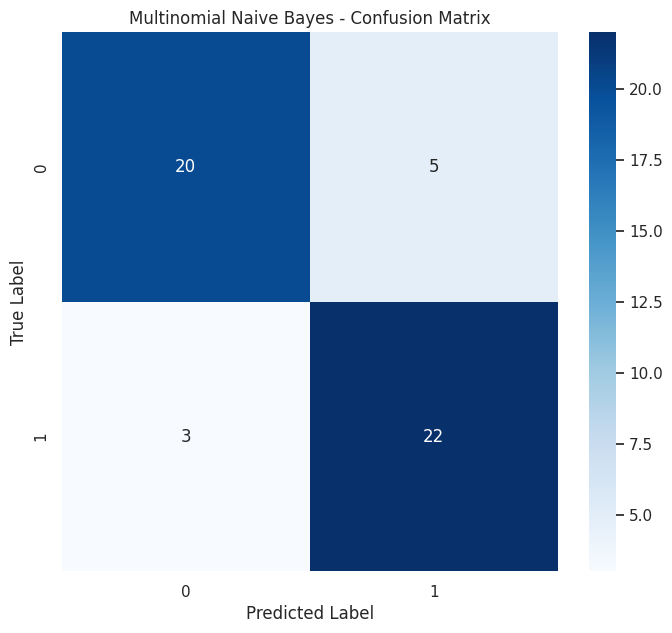

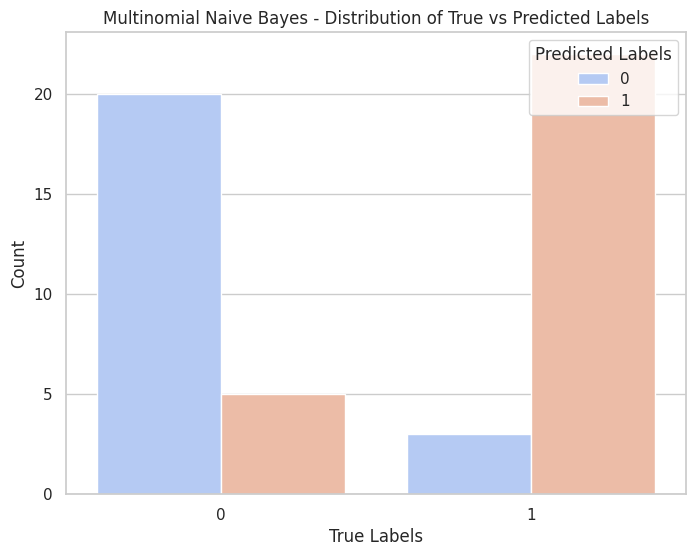

In [32]:
# Choose the model you want to use (e.g., Multinomial Naive Bayes)
selected_model_name = "Multinomial Naive Bayes"  # Change this to switch models
model = classifiers[selected_model_name]

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{selected_model_name} Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_,
)
plt.title(f"{selected_model_name} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional Visualization: Distribution of Correct and Incorrect Predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, hue=y_pred, palette="coolwarm")
plt.title(f"{selected_model_name} - Distribution of True vs Predicted Labels")
plt.xlabel("True Labels")
plt.ylabel("Count")
plt.legend(title="Predicted Labels", loc="upper right")
plt.show()

# Logistic Regression


Logistic Regression Accuracy: 78.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.77      0.80      0.78        25

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50

Confusion Matrix:
[[19  6]
 [ 5 20]]


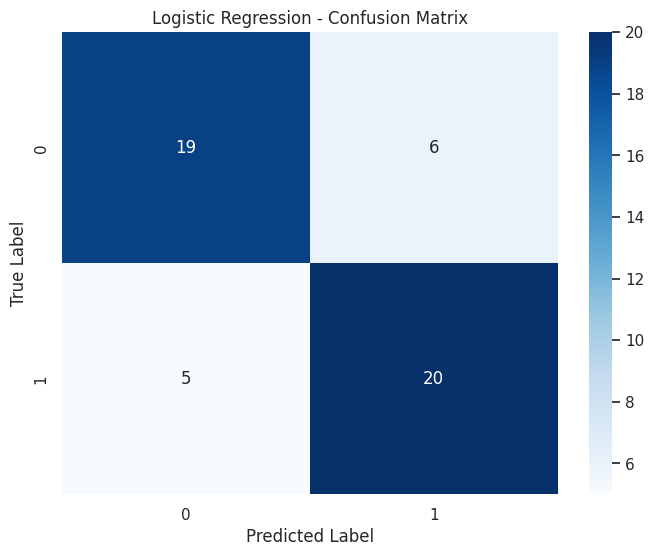

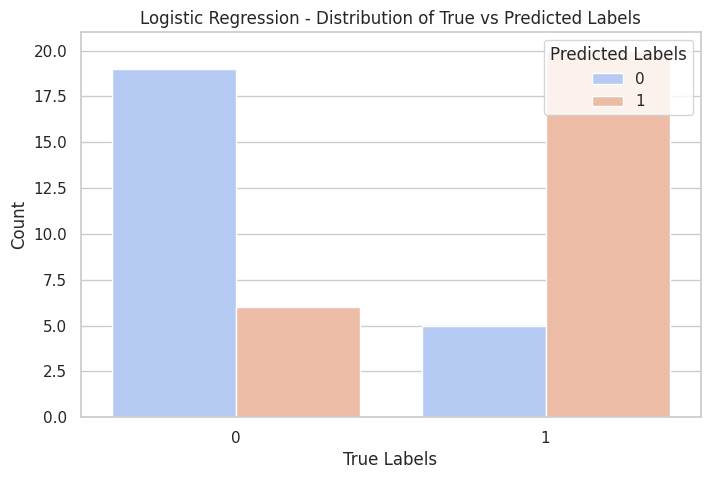

In [33]:
# Choose the model you want to use (e.g., Multinomial Naive Bayes)
selected_model_name = "Logistic Regression"  # Change this to switch models
model = classifiers[selected_model_name]

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{selected_model_name} Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_,
)
plt.title(f"{selected_model_name} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional Visualization: Distribution of Correct and Incorrect Predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, hue=y_pred, palette="coolwarm")
plt.title(f"{selected_model_name} - Distribution of True vs Predicted Labels")
plt.xlabel("True Labels")
plt.ylabel("Count")
plt.legend(title="Predicted Labels", loc="upper right")
plt.show()

# Support Vector Machine


Support Vector Machine Accuracy: 68.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.63      0.88      0.73        25

    accuracy                           0.68        50
   macro avg       0.71      0.68      0.67        50
weighted avg       0.71      0.68      0.67        50

Confusion Matrix:
[[12 13]
 [ 3 22]]


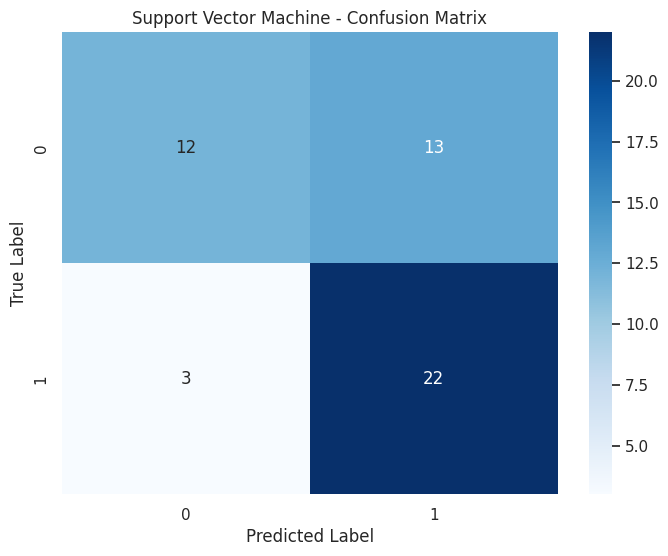

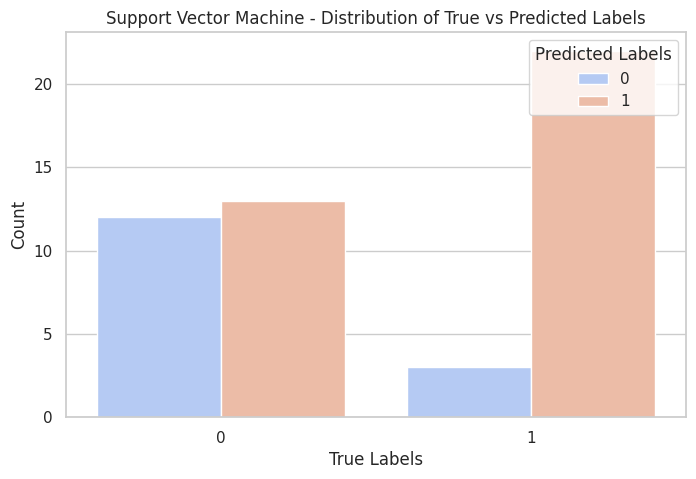

In [34]:
# Choose the model you want to use (e.g., Multinomial Naive Bayes)
selected_model_name = "Support Vector Machine"  # Change this to switch models
model = classifiers[selected_model_name]

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{selected_model_name} Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_,
)
plt.title(f"{selected_model_name} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional Visualization: Distribution of Correct and Incorrect Predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, hue=y_pred, palette="coolwarm")
plt.title(f"{selected_model_name} - Distribution of True vs Predicted Labels")
plt.xlabel("True Labels")
plt.ylabel("Count")
plt.legend(title="Predicted Labels", loc="upper right")
plt.show()

# Random Forest


Random Forest Accuracy: 78.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.75      0.84      0.79        25

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50

Confusion Matrix:
[[18  7]
 [ 4 21]]


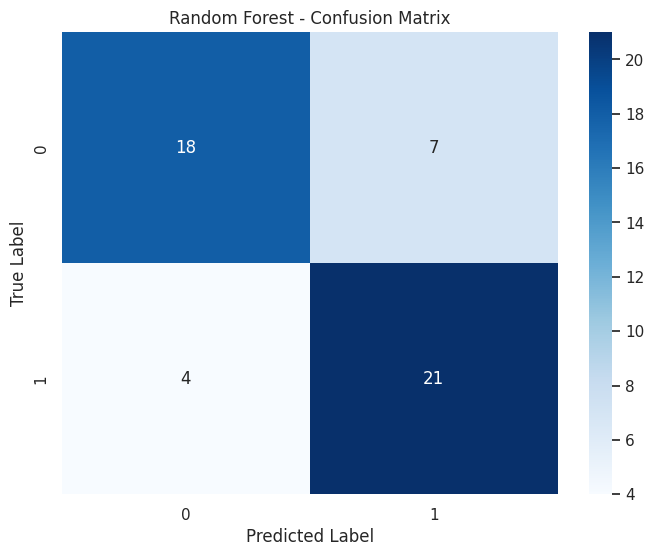

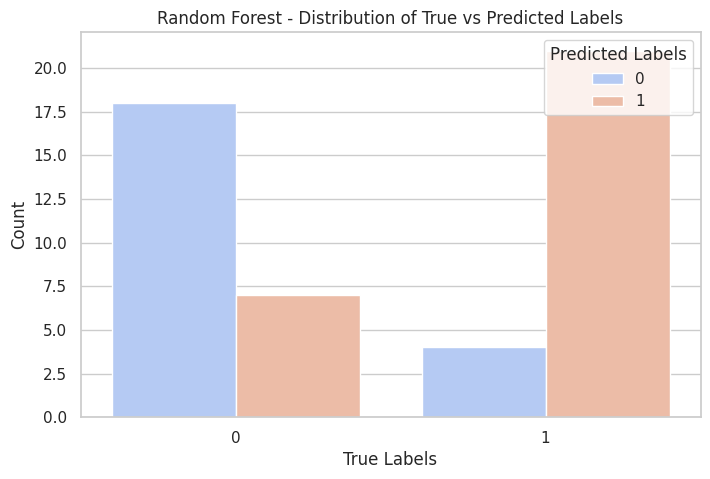

In [35]:
# Choose the model you want to use (e.g., Multinomial Naive Bayes)
selected_model_name = "Random Forest"  # Change this to switch models
model = classifiers[selected_model_name]

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{selected_model_name} Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_,
)
plt.title(f"{selected_model_name} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional Visualization: Distribution of Correct and Incorrect Predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, hue=y_pred, palette="coolwarm")
plt.title(f"{selected_model_name} - Distribution of True vs Predicted Labels")
plt.xlabel("True Labels")
plt.ylabel("Count")
plt.legend(title="Predicted Labels", loc="upper right")
plt.show()

**Explanation:**
- `CountVectorizer`: Converts a collection of text documents to a matrix of token counts.
- Each row in the matrix corresponds to a document, and each column corresponds to a unique word in the corpus.
- The values in the matrix represent the frequency of each word in the corresponding document.




#### **3.4 TF-IDF (Term Frequency-Inverse Document Frequency):** (Skip)

TF-IDF is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It considers both the frequency of a word in a document and the overall importance of the word in the entire corpus.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents with simple day-to-day sentences
documents = [
    "Apples are delicious fruits that are enjoyed by many people.",
    "Bananas are a popular choice for a healthy snack.",
    "Oranges are juicy citrus fruits rich in vitamin C.",
    "Grapes are small, sweet berries often used to make juice or wine."
]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

# Get the vocabulary (terms)
vocabulary = tfidf_vectorizer.get_feature_names_out()

# Display TF-IDF vectors for each document
for i, document in enumerate(documents):
    print(f"TF-IDF Vector for Document {i+1}:")
    for term, tfidf_value in zip(vocabulary, tfidf_vectors.toarray()[i]):
        print(f"{term}: {tfidf_value:.3f}")
    print()

TF-IDF Vector for Document 1:
apples: 0.339
are: 0.354
bananas: 0.000
berries: 0.000
by: 0.339
choice: 0.000
citrus: 0.000
delicious: 0.339
enjoyed: 0.339
for: 0.000
fruits: 0.267
grapes: 0.000
healthy: 0.000
in: 0.000
juice: 0.000
juicy: 0.000
make: 0.000
many: 0.339
often: 0.000
or: 0.000
oranges: 0.000
people: 0.339
popular: 0.000
rich: 0.000
small: 0.000
snack: 0.000
sweet: 0.000
that: 0.339
to: 0.000
used: 0.000
vitamin: 0.000
wine: 0.000

TF-IDF Vector for Document 2:
apples: 0.000
are: 0.208
bananas: 0.399
berries: 0.000
by: 0.000
choice: 0.399
citrus: 0.000
delicious: 0.000
enjoyed: 0.000
for: 0.399
fruits: 0.000
grapes: 0.000
healthy: 0.399
in: 0.000
juice: 0.000
juicy: 0.000
make: 0.000
many: 0.000
often: 0.000
or: 0.000
oranges: 0.000
people: 0.000
popular: 0.399
rich: 0.000
small: 0.000
snack: 0.399
sweet: 0.000
that: 0.000
to: 0.000
used: 0.000
vitamin: 0.000
wine: 0.000

TF-IDF Vector for Document 3:
apples: 0.000
are: 0.199
bananas: 0.000
berries: 0.000
by: 0.000
choice:

In [38]:
# Assuming you have already mounted Google Drive and loaded the IMDB dataset into a DataFrame df

# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer

# Take a smaller sample of the 'review' column from the IMDB dataset
sample_size = 1000  # You can adjust the sample size based on your needs
corpus_sample = df_train['review'].head(sample_size).tolist()

# Create an instance of the TfidfVectorizer class
vectorizer_tfidf = TfidfVectorizer()

# Create the TF-IDF representation for the given corpus sample
X_tfidf = vectorizer_tfidf.fit_transform(corpus_sample)

# Display the feature names (unique words) in the corpus
print("Feature Names (Unique Words):", vectorizer_tfidf.get_feature_names_out()[:20])  # Displaying the first 20 feature names

# Display the TF-IDF matrix (showing only the first 5 reviews for brevity)
print("TF-IDF Matrix:")
print(X_tfidf[:5].toarray())


Feature Names (Unique Words): ['049365' '050' '08012014' '08022014' '0z' '10' '100' '1000' '10000'
 '100000' '100am' '100waiter' '101' '1010am' '1012ish' '1015' '1027'
 '1030' '1040am' '1045']
TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Explanation:**
- `TfidfVectorizer`: Converts a collection of raw documents to a matrix of TF-IDF features.
- The TF-IDF matrix is similar to the Bag of Words matrix but gives more weight to terms that are important to a specific document.



#### **3.5 Word Embeddings (Word2Vec):**

Word Embeddings represent words as dense vectors in a continuous vector space, capturing semantic relationships between words. Word2Vec is a popular method for generating word embeddings.


In [39]:
# Assuming you have already mounted Google Drive and loaded the IMDB dataset into a DataFrame df

# Import the Word2Vec class from the gensim.models module
from gensim.models import Word2Vec

# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Tokenize a smaller sample of the 'review' column from the IMDB dataset
sample_size = 1000  # You can adjust the sample size based on your needs
tokenized_corpus_sample = [word_tokenize(review.lower()) for review in df_train['review'].head(sample_size).tolist()]

# Create the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus_sample, vector_size=100, window=5, min_count=1, workers=4)
# Adjust the parameters (e.g., vector_size, window) based on your specific requirements.

# Get the vector representation of a word (e.g., 'document')
vector_representation = word2vec_model.wv['food']

# Print the vector representation
print("Vector representation of 'food':", vector_representation)


Vector representation of 'food': [-0.41358596  0.72534806  0.24288368  0.08243009 -0.18709546 -1.4065136
  0.21937393  1.6260809  -0.5965276  -0.57421505 -0.5696522  -1.0267409
 -0.17019385  0.20913087  0.30203527 -0.6765584  -0.07259417 -1.0041195
  0.2375121  -1.5744333   0.64574176  0.60632974  0.34107298 -0.33341625
 -0.08445673  0.10740803 -0.67774636 -0.6364358  -0.75040245  0.11506303
  1.0637145   0.175777    0.049565   -0.34359592 -0.30137253  1.1029357
 -0.2606211  -0.7409227  -0.1374702  -1.6221709   0.28593352 -0.86853683
 -0.13174385  0.01625469  0.93082505 -0.59331626 -0.54594487 -0.08155835
  0.34673485  0.5113797   0.33375672 -0.5147267  -0.384858   -0.23204817
 -0.5510169   0.3740625   0.2447656  -0.26327714 -1.0901442   0.09867992
  0.4574666   0.15714863 -0.34262    -0.21417657 -1.133218    0.8177595
  0.25410753  0.508077   -0.97569513  1.0980942  -0.6169393   0.54237473
  1.0264026  -0.344621    0.87681794  0.54245585 -0.33794063  0.08988235
 -0.5406408   0.2857050


**Explanation:**
- `Word2Vec`: Learns word embeddings from a large corpus of text.
- Each word is represented as a dense vector, capturing semantic relationships.

## **4. Word Embeddings (Word2Vec):**

#### **4.1 Word2Vec Basics:**

Word2Vec is a popular word embedding technique that represents words as dense vectors in a continuous vector space. It captures semantic relationships between words and is widely used in natural language processing tasks.

Word2Vec has two primary architectures:

1. **Continuous Bag of Words (CBOW):**
   - Predicts the current word given its context words.
   - Suitable for smaller datasets.

2. **Skip-gram:**
   - Predicts context words given the current word.
   - Performs well with larger datasets and captures more detailed word relationships.

#### **4.2 Gensim Library for Word2Vec:**

Gensim is a Python library that provides tools for working with Word2Vec models. It's efficient and allows for the training of Word2Vec models on large datasets.

#### **Real-life Code Example:**

Let's demonstrate how to use Gensim to train a Word2Vec model on a small corpus.

In [41]:
# Assuming you have already mounted Google Drive and loaded the IMDB dataset into a DataFrame df

# Import the Word2Vec class from the gensim.models module
from gensim.models import Word2Vec

# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Import the Natural Language Toolkit (nltk) library
import nltk
# Download the Punkt tokenizer model (if not already downloaded)
nltk.download('punkt')

# Take a smaller sample of the 'review' column from the IMDB dataset
sample_size = 1000  # You can adjust the sample size based on your needs
tokenized_corpus_sample = [word_tokenize(review.lower()) for review in df_train['review'].head(sample_size).tolist()]

# Create the Word2Vec model (Skip-gram)
word2vec_model = Word2Vec(sentences=tokenized_corpus_sample, vector_size=100, window=5, min_count=1, workers=4, sg=1)
# Adjust the parameters (e.g., vector_size, window) based on your specific requirements.

# Save the Word2Vec model
word2vec_model.save("/content/word2vec_model_zomato_sample.model")
# - Saves the trained Word2Vec model to a file named "word2vec_model_imdb_sample.model".

# Load the Word2Vec model
loaded_model = Word2Vec.load("/content/word2vec_model_zomato_sample.model")
# - Loads the Word2Vec model from the saved file.

# Get the vector representation of a word (e.g., 'movie')
vector_representation = loaded_model.wv['crust']
# - loaded_model.wv['movie']: Retrieves the vector representation of the word 'movie' from the loaded Word2Vec model.

# Print the vector representation
print("Vector representation of 'crust':", vector_representation)
# - Prints the vector representation of the word 'movie'.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vector representation of 'crust': [-0.1239064   0.2523996   0.07366861  0.10561311 -0.05387108 -0.47537702
 -0.00351312  0.48309353 -0.17467304 -0.15502594 -0.19422394 -0.16862923
 -0.07044481  0.09684393  0.05053734 -0.18665622 -0.15150413 -0.28623918
  0.02195398 -0.4212013   0.1900682   0.12525699 -0.03349568 -0.05346381
 -0.0225209  -0.06916159 -0.09202334 -0.16492133 -0.22171144  0.05017487
  0.3078515  -0.03695339  0.00612272  0.02702228 -0.06915609  0.27258882
 -0.13629751 -0.22698593  0.02174064 -0.51566815  0.15382002 -0.24735214
 -0.07992607 -0.04068626  0.31346002 -0.22030243 -0.18767625  0.00929586
  0.03953473  0.15627877  0.14437264 -0.1489589  -0.12215028 -0.02168577
 -0.2702881   0.15194154  0.04213897 -0.17874597 -0.32336628  0.02695942
  0.15091796  0.07725022 -0.09735428 -0.0978606  -0.30549568  0.19284602
  0.07195464  0.04373439 -0.1960429   0.3408503  -0.21299234  0.1938779
  0.21409999 -0.09471298  0.23194191  0.20130904 -0.14976768 -0.00092041
 -0.07530773  0.12

**Explanation:**
- `Word2Vec`: Initializes a Word2Vec model.
- `sentences`: The tokenized sentences from the corpus.
- `vector_size`: Dimensionality of the word vectors.
- `window`: Maximum distance between the current and predicted word within a sentence.
- `min_count`: Ignores all words with a total frequency lower than this.
- `workers`: Number of CPU cores to use when training the model.
- `sg=1`: Indicates the Skip-gram architecture.

In the example, we tokenize the corpus, train a Word2Vec model using Gensim, save the model, and then load it back to obtain the vector representation of the word 'word'.

This Word2Vec model can be used to obtain vector representations for words in a given context, enabling semantic similarity and analogy calculations.

## **5. Seq2Seq Models:**

#### **5.1 Introduction to Seq2Seq:**

Sequence-to-Sequence (Seq2Seq) models are a type of neural network architecture designed for tasks involving sequences, such as language translation, summarization, and chatbot responses. The basic idea is to use two recurrent neural networks (RNNs) known as an encoder and a decoder to transform input sequences into output sequences.

#### **5.2 Encoder-Decoder Architecture:**

The Seq2Seq model comprises two main components: an encoder and a decoder.

**5.2.1 Encoder:**
   - Takes an input sequence and encodes it into a fixed-size context vector.
   - The context vector contains essential information about the input sequence.
   - Commonly implemented using recurrent neural networks (RNNs) or long short-term memory networks (LSTMs).

**5.2.2  Decoder:**
   - Takes the context vector produced by the encoder and generates the output sequence.
   - Predicts one element at a time, often autoregressively.
   - Also commonly implemented using RNNs or LSTMs.

#### **Real-life Code Example:**

Let's create a simple Seq2Seq model using the Keras library for language translation. In this example, we'll train a Seq2Seq model to translate English sentences to French.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [51]:
# Prepare the data
X = df_train["review"].tolist()
label_mapping = {"positive": 1, "negative": 0}
y = [label_mapping[label] for label in df_train["sentiment"]]

vocab_size = 10000
max_len = 100
training_size = 21000

y = np.array(y)
X_train = X[0:training_size]
X_test = X[training_size:]
y_train = y[0:training_size]
y_test = y[training_size:]

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = np.array(pad_sequences(X_train, maxlen=max_len))
X_test = np.array(pad_sequences(X_test, maxlen=max_len))

# Build the LSTM model
latent_dim = 64
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=latent_dim, input_length=max_len))
model.add(LSTM(latent_dim, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - accuracy: 0.7511 - loss: 0.4767 - val_accuracy: 0.8867 - val_loss: 0.2696
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.9267 - loss: 0.1874 - val_accuracy: 0.8805 - val_loss: 0.2823
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9534 - loss: 0.1304 - val_accuracy: 0.8838 - val_loss: 0.3532
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9720 - loss: 0.0815 - val_accuracy: 0.8914 - val_loss: 0.3397
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9778 - loss: 0.0666 - val_accuracy: 0.8798 - val_loss: 0.4141
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8816 - loss: 0.4079
Test Loss: 0.3966, Test Accuracy: 0.8836


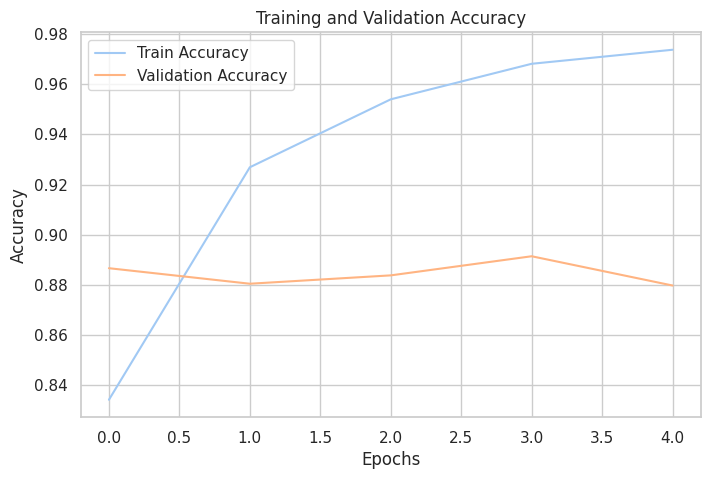

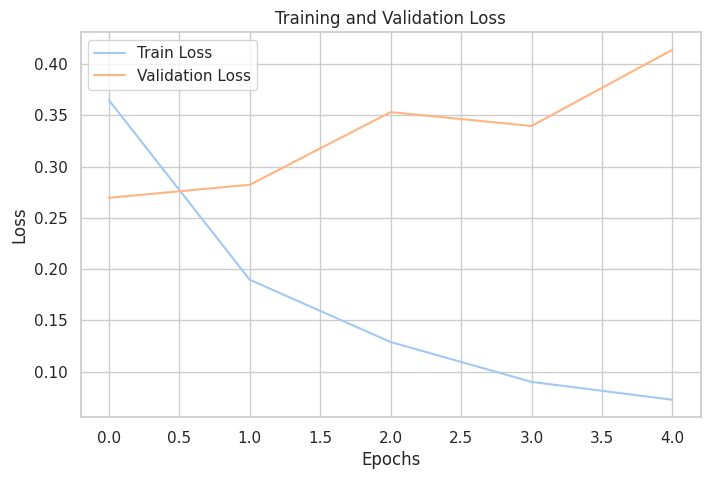

In [52]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Explanation:**

This code demonstrates a simple Seq2Seq model using Keras for English-to-French word translation:

1. **Data Preparation:**
   - Lists of English and French words.
   - Tokenization using dictionaries (`tokenizer_eng` and `tokenizer_frn`).

2. **Sequence and One-Hot Encoding:**
   - Conversion of words to integer sequences (`seqs_eng` and `seqs_frn`).
   - One-hot encoding of sequences (`one_hot_eng` and `one_hot_frn`).

3. **Seq2Seq Model:**
   - Sequential model with Embedding, LSTM, and Dense layers.
   - Embedding layer maps input sequences to vectors.
   - LSTM layer captures sequential patterns.
   - Dense layer with softmax activation predicts the output sequence.

4. **Model Compilation and Training:**
   - Compilation with Adam optimizer, categorical cross-entropy loss, and accuracy metric.
   - Training on one-hot encoded English and French sequences.

5. **Inference:**
   - Input word 'hello' is converted to a one-hot encoded sequence.
   - Model predicts the output sequence.
   - Predicted word is obtained by finding the word with the highest probability in the French vocabulary.

6. **Results Printing:**
   - Prints the input English word and the predicted French word.

This example is educational, illustrating the fundamental structure of a Seq2Seq model for word translation.

## **6. Transformer Models with Attention**

### **6.1 Introduction to Transformers:**

- Transformers are a type of neural network architecture introduced in the paper "Attention is All You Need."
- Key components: self-attention mechanism, encoder-decoder structure.
- Effective in capturing long-range dependencies in sequences.


In [53]:
# Install the transformers library
!pip install transformers

# Import necessary classes from the transformers library
from transformers import BertTokenizer, BertModel

# Tokenize input text
# Instantiate a BERT tokenizer for the 'bert-base-uncased' model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input text to be tokenized
text = "This is an introduction to transformers."

# Encode the input text using the BERT tokenizer
# 'return_tensors' parameter specifies that PyTorch tensors should be returned as "pt"->pytorch tensor
encoded_tokens = tokenizer.encode(text, return_tensors='pt')

# Load pre-trained BERT model
# Instantiate a BERT model for the 'bert-base-uncased' variant
model = BertModel.from_pretrained('bert-base-uncased')

# Forward pass through the BERT model
# Pass the encoded tokens through the BERT model to obtain the output
output = model(encoded_tokens)

# Print the output
print(output)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.3407, -0.0158, -0.1392,  ..., -0.4034,  0.3556,  0.6352],
         [-0.7462, -0.6976, -0.1616,  ..., -0.0087,  0.8424,  0.2508],
         [-0.5540, -0.6966,  0.8854,  ...,  0.3237,  0.1576,  0.9480],
         ...,
         [ 2.2967, -0.1664,  0.3546,  ..., -0.5724, -0.3273,  0.3215],
         [ 0.5750,  0.0995, -0.3975,  ...,  0.2667, -0.2205, -0.4782],
         [ 0.5753,  0.1630, -0.0906,  ...,  0.2518, -0.5264, -0.3900]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.9570, -0.5569, -0.9623,  0.9004,  0.7563, -0.2063,  0.9565,  0.4562,
         -0.8887, -1.0000, -0.6778,  0.9670,  0.9836,  0.6399,  0.9413, -0.8410,
         -0.3558, -0.6316,  0.3938, -0.7038,  0.6955,  1.0000,  0.0240,  0.4847,
          0.5733,  0.9959, -0.8466,  0.9564,  0.9773,  0.7756, -0.8173,  0.3507,
         -0.9875, -0.3182, -0.9632, -0.9967,  0.6160, -0.8233, -0.0236, -0.1948,
         -0.9170,  0.4625,  1.00

### **6.2 BERT (Bidirectional Encoder Representations from Transformers):**
#### Theory:
- BERT is a pre-trained transformer model designed for bidirectional representation learning.
- It utilizes masked language modeling and next sentence prediction during pre-training.
- State-of-the-art performance in various NLP tasks.

#### Code Example:

In [54]:
from transformers import BertTokenizer, BertForMaskedLM

# Tokenize and mask input text
# Instantiate a BERT tokenizer for the 'bert-base-uncased' model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input text to be tokenized and masked
text = "The cat is [MASK] on the mat."

# Encode the input text using the BERT tokenizer
# 'return_tensors' parameter specifies that PyTorch tensors should be returned
encoded_tokens = tokenizer.encode(text, return_tensors='pt')  # Use encode directly

# Load pre-trained BERT model for masked language modeling
# Instantiate a BERT model for masked language modeling (MLM)
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# Forward pass through the BERT model for masked language modeling
# 'return_dict=True' returns a dictionary containing various model outputs
output = model(encoded_tokens, return_dict=True)

# Retrieve the predicted logits (scores) for masked tokens
predictions = output.logits

# Print the predicted logits
print(predictions)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[[ -6.6352,  -6.5930,  -6.5885,  ...,  -5.9774,  -5.6839,  -4.0493],
         [-14.5612, -14.3862, -14.4238,  ..., -12.1998, -11.9709, -11.0100],
         [ -8.0677,  -8.1387,  -8.1146,  ...,  -7.2061,  -6.4629,  -6.5417],
         ...,
         [ -7.3555,  -7.8470,  -8.0578,  ...,  -7.2294,  -6.7105,  -5.0182],
         [-10.6764, -10.2837, -10.5259,  ...,  -8.5979,  -9.6679,  -6.8525],
         [-10.5542, -10.5132, -10.5281,  ...,  -9.9582,  -9.2576,  -5.6333]]],
       grad_fn=<ViewBackward0>)
